In [324]:
import os 
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



In [325]:
os.listdir()

data = pd.read_sas('xtrfxcovbs.sas7bdat')

In [326]:
data.columns = data.columns.str.lower()
data.columns

Index(['replicate', 't_xtrdate', 'r_xtrdate', 'nonewosteofx_enddate',
       'nonewhipfx_enddate', 'qid', 't_fl_fea', 't_ctpo_ec', 't_ttar',
       't_ctar', 't_tbar', 't_ttbmd', 't_ctbmd', 't_ctth', 't_tbbmd', 't_tbn',
       't_tbth', 't_tbsp', 't_moart', 'r_fl_fea', 'r_ctpo_ec', 'r_ttar',
       'r_ctar', 'r_tbar', 'r_ttbmd', 'r_ctbmd', 'r_ctth', 'r_tbbmd', 'r_tbn',
       'r_tbth', 'r_tbsp', 'r_moart', 't_bvtv', 'r_bvtv', 'fnewopfxd',
       'fnewhipfxd', 'newosteofx', 'firstnewosteofx_site',
       'firstnewosteofx_year', 'firstnewosteofx_month', 'firstnewosteofx_day',
       'newosteofx_trauma', 'newhipfx', 'firstnewhipfx_year',
       'firstnewhipfx_month', 'firstnewhipfx_day', 'newhipfx_trauma',
       'nonewosteofx_enddispo', 'nonewhipfx_enddispo', 'age', 'height',
       'weight', 'centre', 'parenthipfx', 'prevfx_any', 'cig_cur',
       'nbalc_week', 'rheu_ever', 'cortico_oral_reg', 'secop', 'nbfall_pastyr',
       'everlost10lbs', 'osteomed', 'i', 'prev_backmt', 'prev_hipmt'

In [327]:
data1 = data[['rheu_ever', 'r_ctth']].dropna()

In [328]:
np.isnan(data1).value_counts()

rheu_ever  r_ctth
False      False     1186
dtype: int64

In [329]:
#stats model
x = data1[['rheu_ever']]
y = data1['r_ctth']

In [330]:
x

,rheu_ever
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1226,0.0
1227,0.0
1228,0.0
1229,0.0


In [331]:
x1 = sm.add_constant(x)

In [332]:
x1

,const,rheu_ever
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1226,1.0,0.0
1227,1.0,0.0
1228,1.0,0.0
1229,1.0,0.0


In [333]:
model = sm.OLS(y, x1)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 r_ctth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.649
Date:                Sun, 06 Mar 2022   Prob (F-statistic):              0.104
Time:                        17:28:28   Log-Likelihood:                 187.65
No. Observations:                1186   AIC:                            -371.3
Df Residuals:                    1184   BIC:                            -361.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6706      0.006    105.614      0.0

In [334]:
data.r_ctth.mean()

0.6672828887952844

In [335]:
#sklearn
data2 = data[['rheu_ever', 'r_ctth', 'age', 'height', 'weight', 'osteomed', 'cig_cur']].dropna()


x2 = data2[['rheu_ever', 'age', 'height', 'weight', 'osteomed', 'cig_cur']]
y2 = data2['r_ctth']

In [336]:
model2 = LinearRegression().fit(x2, y2)

In [337]:
#results
r_sq = model2.score(x2,y2)
intercept, coefficients = model2.intercept_, model2.coef_

In [338]:
r_sq, intercept, coefficients

(0.13648316271617456,
 2.0468228995569957,
 array([-0.04041393, -0.00738476, -0.00663526,  0.00315918,  0.00280674,
        -0.04119411]))

In [339]:
print("R2: ", round(r_sq,3))
print("Intercept: ", round(intercept,2))
print("b(rheu_ever): ", round(coefficients[0],3))

R2:  0.136
Intercept:  2.05
b(rheu_ever):  -0.04


In [340]:
#stats model
data3 = data[['rheu_ever', 'r_ctth', 'age', 'height', 'weight', 'osteomed', 'cig_cur']].dropna()


x2 = data3[['rheu_ever', 'age', 'height', 'weight', 'osteomed', 'cig_cur']]
y2 = data3['r_ctth']

In [341]:
x3 = sm.add_constant(x2)

In [342]:
x3

,const,rheu_ever,age,height,weight,osteomed,cig_cur
0,1.0,0.0,75.0,166.2,69.8,1.0,0.0
1,1.0,0.0,75.0,166.2,69.8,1.0,0.0
2,1.0,0.0,69.0,164.5,91.0,0.0,0.0
3,1.0,0.0,69.0,161.0,69.1,0.0,0.0
4,1.0,0.0,78.0,153.4,64.6,1.0,0.0
...,...,...,...,...,...,...,...
1226,1.0,0.0,70.0,162.5,64.0,0.0,0.0
1227,1.0,0.0,70.0,162.5,64.0,0.0,0.0
1228,1.0,0.0,70.0,162.5,64.0,0.0,0.0
1229,1.0,0.0,70.0,162.5,64.0,0.0,0.0


In [343]:
model3 = sm.OLS(y2, x3)
results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 r_ctth   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     31.03
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           9.65e-35
Time:                        17:28:28   Log-Likelihood:                 272.63
No. Observations:                1185   AIC:                            -531.3
Df Residuals:                    1178   BIC:                            -495.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0468      0.168     12.164      0.0

# PART 2 LOGISTIC REGRESION

In [344]:
data4 = data[['t_fl_fea', 'newosteofx', 'age', 'height', 'weight', 'osteomed', 'prevfx_any', 'nbalc_week']].dropna()
data4['t_fl_fea_sd'] = -1 * data4['t_fl_fea'] / data4.t_fl_fea.std()

In [345]:
data4

,t_fl_fea,newosteofx,age,height,weight,osteomed,prevfx_any,nbalc_week,t_fl_fea_sd
0,4901.9,0.0,75.0,166.2,69.8,1.0,1.0,0.0,-5.030961
1,4901.9,0.0,75.0,166.2,69.8,1.0,1.0,0.0,-5.030961
2,6204.0,0.0,69.0,164.5,91.0,0.0,1.0,4.0,-6.367344
3,5529.5,0.0,69.0,161.0,69.1,0.0,1.0,1.0,-5.675085
4,5638.3,0.0,78.0,153.4,64.6,1.0,1.0,14.0,-5.786749
...,...,...,...,...,...,...,...,...,...
1226,5465.0,0.0,70.0,162.5,64.0,0.0,0.0,2.0,-5.608887
1227,5465.0,0.0,70.0,162.5,64.0,0.0,0.0,2.0,-5.608887
1228,5465.0,0.0,70.0,162.5,64.0,0.0,0.0,2.0,-5.608887
1229,5465.0,0.0,70.0,162.5,64.0,0.0,0.0,2.0,-5.608887


In [346]:
x5 = data4[['t_fl_fea_sd']]
y5 = data4['newosteofx']

In [347]:
x6 = sm.add_constant(x5)

In [348]:
model5 = sm.Logit(y5,x6).fit()
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.322456
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             newosteofx   No. Observations:                 1194
Model:                          Logit   Df Residuals:                     1192
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.01143
Time:                        17:28:29   Log-Likelihood:                -385.01
converged:                       True   LL-Null:                       -389.47
Covariance Type:            nonrobust   LLR p-value:                  0.002843
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5729      0.552     -1.038      0.299      -1.655       0.509
t_fl_fea_sd     0.2992    

In [349]:
#compute odds ratio
orparm = model5.params
conf = model5.conf_int()

In [350]:
# Better way to display odds ratios: 

# create a user defined function
# just replace mod with your fitted model name 
# ie.  ORtab(fittedmodel)

def ORtab(mod):
    odds_ratios = pd.DataFrame(
        {
            "OR": mod.params,
            "Lower CI": mod.conf_int()[0],
            "Upper CI": mod.conf_int()[1],
        }
    )
    odds_ratios = round(np.exp(odds_ratios),2)
    return odds_ratios
  
print(ORtab(model5))

               OR  Lower CI  Upper CI
const        0.56      0.19      1.66
t_fl_fea_sd  1.35      1.10      1.65


In [351]:
#modify dateframe to add odds ratio and labels
conf['Odds Ratio'] = orparm
conf.columns = ['5%', '95%', 'Odds Ratio']
ortable = np.exp(conf)
print(ortable)


                   5%       95%  Odds Ratio
const        0.191120  1.663643    0.563875
t_fl_fea_sd  1.103149  1.648955    1.348719


In [352]:
x10 = data4[['t_fl_fea_sd','age', 'height', 'weight', 'osteomed', 'prevfx_any', 'nbalc_week' ]]
y10 = data4['newosteofx']

In [353]:
x11 = sm.add_constant(x10)
x11

,const,t_fl_fea_sd,age,height,weight,osteomed,prevfx_any,nbalc_week
0,1.0,-5.030961,75.0,166.2,69.8,1.0,1.0,0.0
1,1.0,-5.030961,75.0,166.2,69.8,1.0,1.0,0.0
2,1.0,-6.367344,69.0,164.5,91.0,0.0,1.0,4.0
3,1.0,-5.675085,69.0,161.0,69.1,0.0,1.0,1.0
4,1.0,-5.786749,78.0,153.4,64.6,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...
1226,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0,2.0
1227,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0,2.0
1228,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0,2.0
1229,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0,2.0


In [354]:
fxmod10 = sm.Logit(y10, x11)
model10fit = fxmod10.fit()

print(model10fit.summary())

Optimization terminated successfully.
         Current function value: 0.314536
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             newosteofx   No. Observations:                 1194
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            7
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.03571
Time:                        17:28:29   Log-Likelihood:                -375.56
converged:                       True   LL-Null:                       -389.47
Covariance Type:            nonrobust   LLR p-value:                 0.0002372
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.1396      2.968     -3.080      0.002     -14.956      -3.323
t_fl_fea_sd     0.3453    

In [355]:
model10fit.params

const         -9.139639
t_fl_fea_sd    0.345326
age            0.014051
height         0.046843
weight         0.004562
osteomed       0.123739
prevfx_any     0.225300
nbalc_week    -0.070027
dtype: float64

In [356]:
round(np.exp(model10fit.params),2)

const          0.00
t_fl_fea_sd    1.41
age            1.01
height         1.05
weight         1.00
osteomed       1.13
prevfx_any     1.25
nbalc_week     0.93
dtype: float64

In [357]:
orparm10 = model10fit.params
conf10 = model10fit.conf_int()

# add column for odds ratio (OR) determined above
conf10['Odds Ratio'] = orparm10
conf10.columns = ['5% CI', '95% CI', 'Odds Ratio'] # change column names 

ortable10 = round(np.exp(conf10),2)
ortable10

,5% CI,95% CI,Odds Ratio
const,0.00,0.04,0.00
t_fl_fea_sd,1.11,1.80,1.41
age,0.99,1.04,1.01
height,1.01,1.08,1.05
weight,0.99,1.02,1.00
osteomed,0.75,1.71,1.13
prevfx_any,0.84,1.87,1.25
nbalc_week,0.88,0.99,0.93


In [358]:
model10fit.aic

767.1129093815554

In [359]:
x20 = data4[['t_fl_fea_sd','age', 'height', 'weight', 'osteomed', 'prevfx_any']]
y20 = data4['newosteofx']

In [360]:
x21 = sm.add_constant(x20)
x21

,const,t_fl_fea_sd,age,height,weight,osteomed,prevfx_any
0,1.0,-5.030961,75.0,166.2,69.8,1.0,1.0
1,1.0,-5.030961,75.0,166.2,69.8,1.0,1.0
2,1.0,-6.367344,69.0,164.5,91.0,0.0,1.0
3,1.0,-5.675085,69.0,161.0,69.1,0.0,1.0
4,1.0,-5.786749,78.0,153.4,64.6,1.0,1.0
...,...,...,...,...,...,...,...
1226,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0
1227,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0
1228,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0
1229,1.0,-5.608887,70.0,162.5,64.0,0.0,0.0


In [361]:
fxmod20 = sm.Logit(y20, x21)
model20fit = fxmod20.fit()

print(model20fit.summary())

Optimization terminated successfully.
         Current function value: 0.317455
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             newosteofx   No. Observations:                 1194
Model:                          Logit   Df Residuals:                     1187
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.02677
Time:                        17:28:29   Log-Likelihood:                -379.04
converged:                       True   LL-Null:                       -389.47
Covariance Type:            nonrobust   LLR p-value:                  0.001953
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.8101      2.954     -2.982      0.003     -14.600      -3.020
t_fl_fea_sd     0.3299    

In [362]:
model20fit.params

const         -8.810065
t_fl_fea_sd    0.329908
age            0.015337
height         0.041255
weight         0.007358
osteomed       0.164729
prevfx_any     0.234256
dtype: float64

In [363]:
round(np.exp(model20fit.params),2)

const          0.00
t_fl_fea_sd    1.39
age            1.02
height         1.04
weight         1.01
osteomed       1.18
prevfx_any     1.26
dtype: float64

In [364]:
orparm20 = model20fit.params
conf20 = model20fit.conf_int()

# add column for odds ratio (OR) determined above
conf20['Odds Ratio'] = orparm20
conf20.columns = ['5% CI', '95% CI', 'Odds Ratio'] # change column names 

ortable20 = round(np.exp(conf20),2)
ortable20

,5% CI,95% CI,Odds Ratio
const,0.00,0.05,0.00
t_fl_fea_sd,1.10,1.76,1.39
age,0.99,1.04,1.02
height,1.01,1.08,1.04
weight,0.99,1.02,1.01
osteomed,0.78,1.78,1.18
prevfx_any,0.85,1.89,1.26


In [365]:
model20fit.aic

772.0827126815961

# PART 3 CLASSIFICATION AND MODEL FIT 

In [366]:
# Hosmer-Lemeshow Goodness of Fit Function

def hosmlemchisq(data,groupby,obs,Exp):
    chisq_tbl=data.groupby(groupby).apply(lambda x: pd.Series([
        np.size(x[obs]),
        np.size(x[Exp][x[Exp]==1]),
        np.size(x[Exp][x[Exp]==0]),   
        np.sum(x[obs]),
        (np.sum(1-x[obs]))      
        ],
        index=(["cnt", "Obs_Resp", "Obs_Non_resp", 
               "Exp_Resp", "Exp_Non_Resp"])
        )).reset_index()
    chisq_tbl=chisq_tbl.sort_values(by=groupby,ascending=False)
    
    chisq_tbl["chisq"] = ( (chisq_tbl["Obs_Resp"]-chisq_tbl["Exp_Resp"])**2
              /(chisq_tbl["Exp_Resp"]*(1-(chisq_tbl["Exp_Resp"]/chisq_tbl["cnt"]))) )
    
    chisq_value = np.sum(chisq_tbl["chisq"])
    
    g = len(data["decile"].value_counts())
    
    chisq_tbl = chisq_tbl.round(2)
    
    import scipy    
    pvalue=scipy.stats.chi2.sf(chisq_value , g-2)
    
    return({"Chisq_Table":chisq_tbl,
            "hosmerlem": {"degree_of_freedom": g-2,
                          "X^2":round(chisq_value,2),
                          "p_value":round(pvalue, 5)}})

In [373]:
# STEP 1, generate predicted outcome values: 
# no good way to generate this
# not needed for Hosmer Lemeshow

# STEP 2, generate predicted probabilities
# note, the function is predict() instead of predict_proba()
data4["prob"] = model10fit.predict(x11) 

# STEP 3, split the probabilities into deciles (binnning of 10):
data4_sorted = data4.sort_values('prob')
data4["decile"]=pd.qcut(data4_sorted['prob'], 10, labels=False)

In [374]:
# STEP 4, run hosmlemchisq() function: 
hltest = hosmlemchisq(data4, "decile", "prob", "newosteofx")
hltest['Chisq_Table']

,decile,cnt,Obs_Resp,Obs_Non_resp,Exp_Resp,Exp_Non_Resp,chisq
9,9,118.0,18.0,100.0,23.84,94.16,1.79
8,8,119.0,16.0,103.0,17.66,101.34,0.18
7,7,121.0,23.0,98.0,15.02,105.98,4.83
6,6,120.0,16.0,104.0,12.92,107.08,0.82
5,5,119.0,16.0,103.0,11.54,107.46,1.91
4,4,114.0,5.0,109.0,9.91,104.09,2.66
3,3,123.0,2.0,121.0,9.67,113.33,6.60
2,2,121.0,13.0,108.0,8.11,112.89,3.17
1,1,118.0,7.0,111.0,6.67,111.33,0.02
0,0,121.0,4.0,117.0,4.65,116.35,0.10


In [376]:
# STEP 5, Print Hosmer-Lemeshow Goodness of Fit p-value:
# < 0.05 means poorly fit 
hltest['hosmerlem']

{'degree_of_freedom': 8, 'X^2': 22.09, 'p_value': 0.00475}

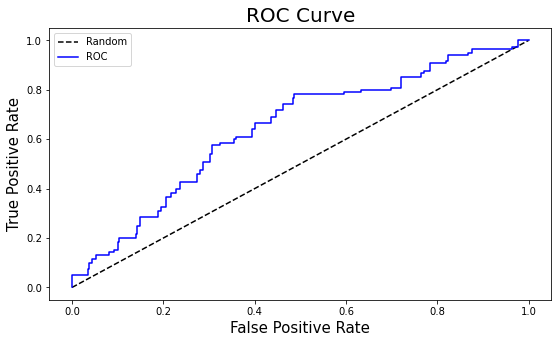

In [378]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(data4["newosteofx"],data4["prob"])

plt.figure(figsize=(9,5))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve', fontsize=20)
plt.legend(fontsize=10, loc='best')
plt.show()

In [380]:
# AUC value: 
roc_auc_score(y10, data4["prob"])

0.6427684667908131

In [381]:
# Sens Spec Table:

senspecthr = pd.DataFrame(np.array([fpr, tpr, thresholds]).T)
senspecthr.columns = ["1-spec","sens","threshold"]

# Compute specificity: 
senspecthr['spec'] = 1-senspecthr['1-spec']

# Youden J - maximize:
senspecthr['youdenj'] = senspecthr['sens'] + senspecthr['spec'] - 1

# Geometric distance from points along the curve to coordinate (0,1) - top left hand corner:
# minimize:
senspecthr['d'] = np.sqrt((1-senspecthr['sens'])**2 + (1-senspecthr['spec'])**2)

# sort by decreasing youdenJ
senspecthr_sorted = senspecthr.sort_values('youdenj', ascending=False)
senspecthr_sorted[['threshold','sens','spec','1-spec','youdenj','d']]

# reindex: 
senspecthr_sorted = senspecthr_sorted.reset_index(drop=True)
senspecthr_sorted

,1-spec,sens,threshold,spec,youdenj,d
0,0.486965,0.783333,0.089799,0.513035,0.296369,0.532991
1,0.487896,0.783333,0.089435,0.512104,0.295438,0.533841
2,0.491620,0.783333,0.088894,0.508380,0.291713,0.537247
3,0.495345,0.783333,0.088740,0.504655,0.287989,0.540658
4,0.496276,0.783333,0.088610,0.503724,0.287058,0.541511
...,...,...,...,...,...,...
437,0.962756,0.966667,0.035615,0.037244,0.003911,0.963333
438,0.974860,0.975000,0.033256,0.025140,0.000140,0.975181
439,0.000000,0.000000,1.351541,1.000000,0.000000,1.000000
440,1.000000,1.000000,0.016130,0.000000,0.000000,1.000000


In [382]:
np.max(senspecthr_sorted['youdenj'])

0.29636871508379903

In [383]:
# isolate the value: 0.117652
probthr = senspecthr_sorted.iloc[0,2]
probthr

0.08979863724155716

In [384]:
# Apply threshold 
data4["pred"] = data4["prob"].apply(lambda x: 1 if (x >= probthr) else 0) 
data4["pred"].value_counts()

1    617
0    577
Name: pred, dtype: int64

In [385]:
# Show confusion matrix / contingency table of predicted vs. observed outcome (newosteofx)
from sklearn.metrics import confusion_matrix
cf_matrix2 = confusion_matrix(data4['newosteofx'], data4['pred'])
cf_matrix2

array([[551, 523],
       [ 26,  94]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Observed'>

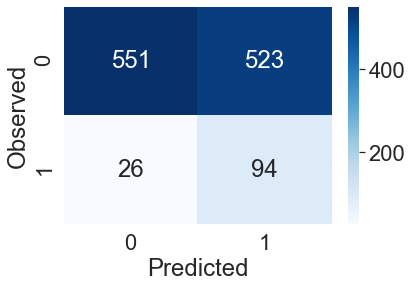

In [386]:
# make it look prettier 

import seaborn as sns
sns.set(font_scale = 2)
cf2 = sns.heatmap(cf_matrix2, annot=True, cmap='Blues', fmt='d')
cf2.set(xlabel='Predicted', ylabel='Observed') # reverse order from above in confusion_matrix() function
cf2